**STOCK PRICE PREDICTION SYSTEM**

**DIALOG AXIATA-Share Historical Data**(daily 02/25/2022-02/25/2024)

In [ ]:
import pandas as pd

#Historiacal data(daily) of Dialog Axiata 02/26/2022-02/25/2024
df = pd.read_csv('DIALOGAXIATA.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02/22/2024,10.5,10.5,10.6,10.4,2.66M,0.00%
1,02/21/2024,10.5,10.3,10.6,10.3,2.65M,1.94%
2,02/20/2024,10.3,10.3,10.4,10.2,1.61M,0.98%
3,02/19/2024,10.2,10.1,10.5,10.1,4.19M,3.03%
4,02/16/2024,9.9,9.7,9.9,9.6,3.25M,3.12%
...,...,...,...,...,...,...,...
468,03/04/2022,11.3,11.4,11.6,11.3,171.45K,-0.88%
469,03/03/2022,11.4,11.7,11.7,11.4,304.17K,-1.72%
470,03/02/2022,11.6,11.7,11.7,11.4,365.13K,-0.85%
471,02/28/2022,11.7,11.4,11.8,11.2,3.82M,3.54%


In [ ]:
df.shape

(473, 7)

In [ ]:
#creating new dataframe with Price column
df1 = df.reset_index()['Price']

In [ ]:
df1.head()

0    10.5
1    10.5
2    10.3
3    10.2
4     9.9
Name: Price, dtype: float64

In [ ]:
df1.shape


(473,)

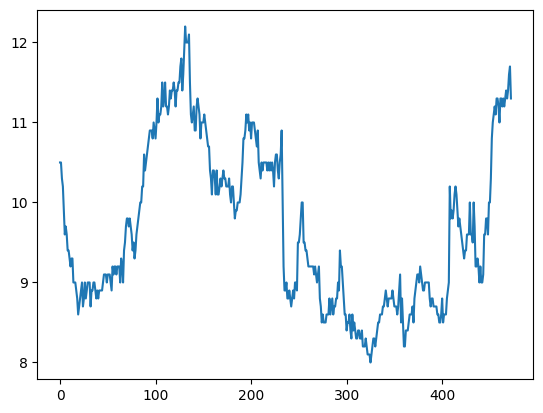

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
df1

0      10.5
1      10.5
2      10.3
3      10.2
4       9.9
       ... 
468    11.3
469    11.4
470    11.6
471    11.7
472    11.3
Name: Price, Length: 473, dtype: float64

In [ ]:
#Imports the necessary scaling tool.
#Prepares a scaler to rescale data between 0 and 1.
#Reshapes the data for compatibility with the scaler.
#Fits the scaler to learn the data's minimum and maximum values.
#Transforms the data using the fitted scaler, resulting in scaled values between 0 and 1.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))


In [ ]:
df1

array([[0.5952381 ],
       [0.5952381 ],
       [0.54761905],
       [0.52380952],
       [0.45238095],
       [0.38095238],
       [0.4047619 ],
       [0.38095238],
       [0.33333333],
       [0.33333333],
       [0.30952381],
       [0.28571429],
       [0.30952381],
       [0.30952381],
       [0.23809524],
       [0.23809524],
       [0.23809524],
       [0.21428571],
       [0.19047619],
       [0.14285714],
       [0.16666667],
       [0.19047619],
       [0.21428571],
       [0.23809524],
       [0.16666667],
       [0.19047619],
       [0.23809524],
       [0.19047619],
       [0.21428571],
       [0.23809524],
       [0.23809524],
       [0.23809524],
       [0.16666667],
       [0.21428571],
       [0.21428571],
       [0.23809524],
       [0.23809524],
       [0.21428571],
       [0.19047619],
       [0.21428571],
       [0.19047619],
       [0.21428571],
       [0.21428571],
       [0.21428571],
       [0.21428571],
       [0.23809524],
       [0.26190476],
       [0.261

**Train-test split is done using cross validation or random seed**

In [ ]:
#this code splits the DataFrame df1 into two DataFrames
training_size = int(len(df1)*0.80)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(378, 95)

In [ ]:
#preprocessing to check time steps
import numpy as np
#convert an aray into a dataset matrix
def create_dataset(dataset,time_step=1):
  dataX, dataY= [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0] #i = 0,1,2,3,... 99   100
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX),np.array(dataY)


In [ ]:
time_step=50
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test  = create_dataset(test_data, time_step)


In [ ]:
print(X_train.shape), print(y_train.shape)

(327, 50)
(327,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(44, 50)
(44,)


(None, None)

In [ ]:
#3d

# reshape input to be [samples, time steps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [ ]:
## Create the Stacked LSTM model #
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model =  Sequential()
model.add(LSTM(40, return_sequences=True, input_shape=(50,1)))
model.add(LSTM(40, return_sequences=True))
model.add(LSTM(40))
model.add(Dense(1))

model.compile(loss ='mean_squared_error',optimizer ='adam')

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 50, 40)            6720      
                                                                 
 lstm_22 (LSTM)              (None, 50, 40)            12960     
                                                                 
 lstm_23 (LSTM)              (None, 40)                12960     
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 32681 (127.66 KB)
Trainable params: 32681 (127.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=40,batch_size=64,verbose=1)

Epoch 1/40
6/6 [==============================] - 8s 464ms/step - loss: 0.1600 - val_loss: 0.0678
Epoch 2/40
6/6 [==============================] - 0s 80ms/step - loss: 0.0353 - val_loss: 0.0305
Epoch 3/40
6/6 [==============================] - 0s 79ms/step - loss: 0.0233 - val_loss: 0.0675
Epoch 4/40
6/6 [==============================] - 1s 100ms/step - loss: 0.0258 - val_loss: 0.0458
Epoch 5/40
6/6 [==============================] - 1s 125ms/step - loss: 0.0167 - val_loss: 0.0284
Epoch 6/40
6/6 [==============================] - 1s 143ms/step - loss: 0.0171 - val_loss: 0.0366
Epoch 7/40
6/6 [==============================] - 1s 122ms/step - loss: 0.0135 - val_loss: 0.0386
Epoch 8/40
6/6 [==============================] - 0s 74ms/step - loss: 0.0125 - val_loss: 0.0321
Epoch 9/40
6/6 [==============================] - 1s 89ms/step - loss: 0.0123 - val_loss: 0.0352
Epoch 10/40
6/6 [==============================] - 0s 79ms/step - loss: 0.0118 - val_loss: 0.0337
Epoch 11/40
6/6 [=======

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


2/2 [==============================] - 0s 17ms/step


In [ ]:
#transform back to oiginal form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [ ]:
### Calculate RMSE performance metrics

import math

from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9.2501594882817

Evaluate the test data predictions

In [ ]:
## Test Data RMSE

math.sqrt(mean_squared_error(y_test, test_predict))

9.485665736983691

Shape of test_predict: (44, 1)
Shape of testPredictPlot slice: (44, 1)


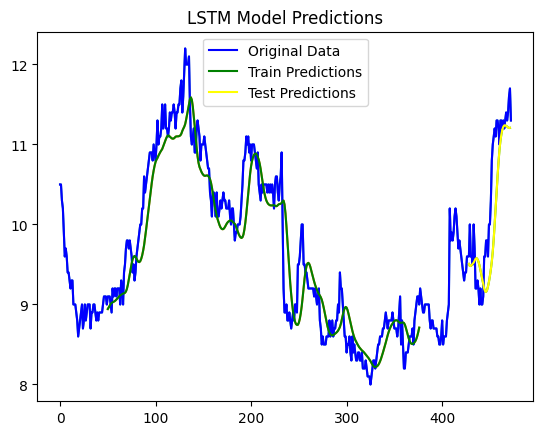

In [ ]:
import numpy
look_back=50
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,] = numpy.nan
print(f"Shape of test_predict: {test_predict.shape}")
print(f"Shape of testPredictPlot slice: {testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :].shape}")
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict.reshape(-1,1)

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

# Plot with labels
plt.plot(scaler.inverse_transform(df1), label='Original Data', color='blue')  # Label for original data
plt.plot(trainPredictPlot, label='Train Predictions', color='green')  # Label for train predictions
plt.plot(testPredictPlot, label='Test Predictions', color='yellow')  # Label for test predictions

# Add a legend to display the labels
plt.legend()

# Optional: Add a title for the plot
plt.title("LSTM Model Predictions")

plt.show()